# Loading Data & Processing

## importing pkgs

In [109]:
## importing pkg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow
import sklearn
sns.set()



## Data loading

In [110]:
# ML_DSC_cell
# ====== data loading ====== #
#magic('%reset -sf')

data_files = ['group-a-1.xlsx', 'group-a-2.xlsx', 'group-a-3.xlsx','group-a-4.xlsx',
              'group-b-1.xlsx', 'group-b-2.xlsx', 'group-b-3.xlsx', 'group-b-4.xlsx',
              'group-c-1.xlsx', 'group-c-2.xlsx', 'group-c-3.xlsx', 'group-c-4.xlsx',
              'group-d-1.xlsx', 'group-d-2.xlsx', 'group-d-3.xlsx', 'group-d-4.xlsx']
n_df = len(data_files)

data_files_mg = ['Group-A-1s-0.3r-mg.csv','Group-A-1s-0.5r-mg.csv','Group-A-1s-0.6r-mg.csv','Group-A-1s-1r-mg.csv',
                'Group-B-0.6s-0.3r-mg.csv','Group-B-0.6s-0.5r-mg.csv','Group-B-0.6s-0.6r-mg.csv','Group-B-0.6s-1r-mg.csv',
                'Group-C-0.5s-0.3r-mg.csv','Group-C-0.5s-0.5r-mg.csv','Group-C-0.5s-0.6r-mg.csv','Group-C-0.5s-1r-mg.csv',
                'Group-D-0.3s-0.3r-mg.csv','Group-D-0.3s-0.5r-mg.csv','Group-D-0.3s-0.6r-mg.csv','Group-D-0.3s-1r-mg.csv']



In [111]:
cp_data_mg = pd.read_csv('data/mgma-gd-group.csv')

cp_data_mg.columns=['T','z0l','zl','z0','zu','z0u']
cp_data_mg_gd_z0 = cp_data_mg.iloc[:,3]


## Data appending and wrangling

In [112]:

df_frames = []
for n_df in range(0,n_df):
    df_name = 'df_' + str(n_df+1)
    df_n = pd.read_excel('data/' + data_files[n_df]) #'/content/drive/MyDrive/colab_nb/ml_dsc_cell' +
    df_m = pd.read_csv('data/' + data_files_mg[n_df])
    df_o = cp_data_mg_gd_z0
    df_nmo = pd.concat([df_n, df_m.iloc[:,1:6],df_o], axis=1, ignore_index=True)
    df_nmo.columns=['Temp','Cp-1','Cp-2','Cp-3','Cp-4','Cp-5','Cp-6','Cp-7','Cp-8','s','r','z0l','zl','z0','zu','z0u','z0_gd']
    df_frames.append(df_nmo)
    df = pd.concat(df_frames, axis=0, ignore_index=True)
    df_out = df.to_csv('data/all_data.csv')
    
    df.head()

# Feature Engineering

In [113]:
# Data check

cp_data = pd.read_csv('data/all_data.csv')

cp_data['Temp[K]'] = cp_data['Temp'] + 273.15

cp_data = cp_data.drop(['z0l', 'zl','zu','z0u', 'Temp'], axis=1)
cp_data = cp_data.drop(columns=cp_data.columns[0], axis=1)
cp_data

,Cp-1,Cp-2,Cp-3,Cp-4,Cp-5,Cp-6,Cp-7,Cp-8,s,r,z0,z0_gd,Temp[K]
0,1.269789,1.309680,1.312751,1.270857,1.277475,1.278631,1.278492,1.278955,1.0,0.3,1.277443,1.343676,294.15
1,1.271276,1.310518,1.314484,1.271888,1.278841,1.279217,1.279715,1.279762,1.0,0.3,1.279447,1.345330,295.15
2,1.272570,1.312047,1.315948,1.273368,1.280174,1.280551,1.280826,1.281637,1.0,0.3,1.280680,1.346649,296.15
3,1.274185,1.312721,1.317608,1.274906,1.281786,1.282042,1.282349,1.282962,1.0,0.3,1.282182,1.348169,297.15
4,1.275536,1.312587,1.318696,1.276110,1.283152,1.283313,1.283771,1.284211,1.0,0.3,1.283509,1.349595,298.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.414559,1.412268,1.417116,1.416687,1.415226,1.412681,1.418410,1.416761,0.3,1.0,1.416054,1.415569,339.15
796,1.414863,1.426357,1.416274,1.415304,1.415113,1.426979,1.416907,1.416386,0.3,1.0,1.415883,1.417238,340.15
797,1.414449,1.417976,1.416876,1.416139,1.414438,1.419453,1.417718,1.416750,0.3,1.0,1.416975,1.416798,341.15
798,1.414624,1.418348,1.417055,1.418191,1.414333,1.418791,1.418112,1.419028,0.3,1.0,1.418175,1.417641,342.15


In [114]:
cp_data['Cp_mean'] = cp_data.iloc[:,0:7].mean(axis=1)
cp_data

,Cp-1,Cp-2,Cp-3,Cp-4,Cp-5,Cp-6,Cp-7,Cp-8,s,r,z0,z0_gd,Temp[K],Cp_mean
0,1.269789,1.309680,1.312751,1.270857,1.277475,1.278631,1.278492,1.278955,1.0,0.3,1.277443,1.343676,294.15,1.285382
1,1.271276,1.310518,1.314484,1.271888,1.278841,1.279217,1.279715,1.279762,1.0,0.3,1.279447,1.345330,295.15,1.286563
2,1.272570,1.312047,1.315948,1.273368,1.280174,1.280551,1.280826,1.281637,1.0,0.3,1.280680,1.346649,296.15,1.287926
3,1.274185,1.312721,1.317608,1.274906,1.281786,1.282042,1.282349,1.282962,1.0,0.3,1.282182,1.348169,297.15,1.289371
4,1.275536,1.312587,1.318696,1.276110,1.283152,1.283313,1.283771,1.284211,1.0,0.3,1.283509,1.349595,298.15,1.290452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.414559,1.412268,1.417116,1.416687,1.415226,1.412681,1.418410,1.416761,0.3,1.0,1.416054,1.415569,339.15,1.415278
796,1.414863,1.426357,1.416274,1.415304,1.415113,1.426979,1.416907,1.416386,0.3,1.0,1.415883,1.417238,340.15,1.418828
797,1.414449,1.417976,1.416876,1.416139,1.414438,1.419453,1.417718,1.416750,0.3,1.0,1.416975,1.416798,341.15,1.416721
798,1.414624,1.418348,1.417055,1.418191,1.414333,1.418791,1.418112,1.419028,0.3,1.0,1.418175,1.417641,342.15,1.417065


## Data cleaning and rearranging at 298K

In [115]:

# keeping only data at room temperature 298K
q = 298.15
cp_data_rt1 = cp_data[cp_data['Temp[K]']<=q]
cp_data_rt = cp_data_rt1[cp_data_rt1['Temp[K]']>=q]

cp_data_rt = cp_data.drop('Temp[K]', axis=1)
cp_data_rt = cp_data_rt.reset_index(drop=True)
cp_data_rt

,Cp-1,Cp-2,Cp-3,Cp-4,Cp-5,Cp-6,Cp-7,Cp-8,s,r,z0,z0_gd,Cp_mean
0,1.269789,1.309680,1.312751,1.270857,1.277475,1.278631,1.278492,1.278955,1.0,0.3,1.277443,1.343676,1.285382
1,1.271276,1.310518,1.314484,1.271888,1.278841,1.279217,1.279715,1.279762,1.0,0.3,1.279447,1.345330,1.286563
2,1.272570,1.312047,1.315948,1.273368,1.280174,1.280551,1.280826,1.281637,1.0,0.3,1.280680,1.346649,1.287926
3,1.274185,1.312721,1.317608,1.274906,1.281786,1.282042,1.282349,1.282962,1.0,0.3,1.282182,1.348169,1.289371
4,1.275536,1.312587,1.318696,1.276110,1.283152,1.283313,1.283771,1.284211,1.0,0.3,1.283509,1.349595,1.290452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.414559,1.412268,1.417116,1.416687,1.415226,1.412681,1.418410,1.416761,0.3,1.0,1.416054,1.415569,1.415278
796,1.414863,1.426357,1.416274,1.415304,1.415113,1.426979,1.416907,1.416386,0.3,1.0,1.415883,1.417238,1.418828
797,1.414449,1.417976,1.416876,1.416139,1.414438,1.419453,1.417718,1.416750,0.3,1.0,1.416975,1.416798,1.416721
798,1.414624,1.418348,1.417055,1.418191,1.414333,1.418791,1.418112,1.419028,0.3,1.0,1.418175,1.417641,1.417065


In [116]:
#cp_only = cp_data_rt.iloc[:,0:8]
#cp_one_clm = pd.Series(cp_only.values.ravel('F'))
#cp_one_clm = pd.DataFrame(cp_one_clm)
cp_st_err = (cp_data_rt['Cp_mean'] / cp_data_rt['z0_gd']) # selecting value from z0_gd
cp_rt_data = pd.concat([cp_data_rt['Cp_mean'],cp_st_err], axis=1, ignore_index=True)
cp_rt_data

,0,1
0,1.285382,0.956616
1,1.286563,0.956318
2,1.287926,0.956393
3,1.289371,0.956387
4,1.290452,0.956177
...,...,...
795,1.415278,0.999795
796,1.418828,1.001122
797,1.416721,0.999946
798,1.417065,0.999593


In [117]:
## appending r and s columns
#r_clm = cp_data_rt['r']
#all_r_clm = pd.concat([r_clm, r_clm, r_clm, r_clm,r_clm, r_clm, r_clm, r_clm,],axis=0,ignore_index=True)

#s_clm= cp_data_rt['s']
#all_s_clm = pd.concat([s_clm, s_clm, s_clm, s_clm,s_clm, s_clm, s_clm, s_clm,],axis=0,ignore_index=True)

## Cean Data Checkpoin

In [118]:
# adding all columns
cp_rt_data1 = pd.concat([cp_rt_data, cp_data_rt['r'], cp_data_rt['s']], axis = 1, ignore_index=False)
cp_rt_data1.columns = ['Cp','St(%)','Ref','Sam']
cp_clean_data = cp_rt_data1.copy() #DATA CHECKPOINT!

In [119]:
R = cp_clean_data['Ref']
S = cp_clean_data['Sam']
cp_clean_data['vol_rel'] = (R*R/S)
cp_clean_data = cp_clean_data.sort_values('St(%)')
cp_clean_data = cp_clean_data.reset_index(drop=True)
cp_clean_data

,Cp,St(%),Ref,Sam,vol_rel
0,1.317002,0.929274,0.3,0.6,0.150000
1,1.315959,0.929633,0.3,0.6,0.150000
2,1.318926,0.929729,0.3,0.6,0.150000
3,1.318454,0.930033,0.3,0.6,0.150000
4,1.317720,0.930069,0.3,0.6,0.150000
...,...,...,...,...,...
795,1.354436,1.000201,1.0,1.0,1.000000
796,1.348441,1.000202,1.0,1.0,1.000000
797,1.352665,1.000250,1.0,1.0,1.000000
798,1.418066,1.000584,1.0,1.0,1.000000


In [120]:
corr_matrix = cp_clean_data.corr()
corr_matrix["St(%)"].sort_values(ascending=False)


St(%)      1.000000
Ref        0.880964
Cp         0.774791
vol_rel    0.695922
Sam        0.073308
Name: St(%), dtype: float64

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_10829/3765321584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp_clean_data['St(%)'])


<AxesSubplot: xlabel='St(%)', ylabel='Density'>

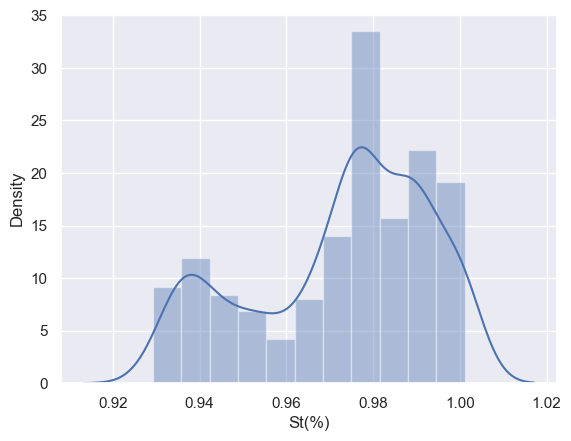

In [121]:
sns.distplot(cp_clean_data['St(%)'])

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_10829/2488532835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp_clean_data['vol_rel'])


<AxesSubplot: xlabel='vol_rel', ylabel='Density'>

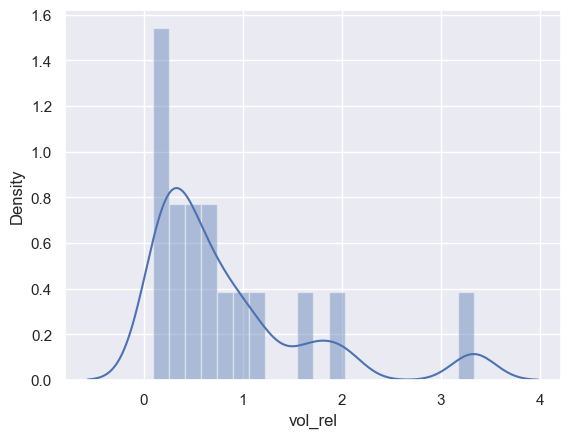

In [122]:
sns.distplot(cp_clean_data['vol_rel'])

Checking the assumptions!

/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_10829/1709502099.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="vol_rel", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
/Users/nirmal/Documents/data_science/microDSC_error_prediction_ANN/.venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


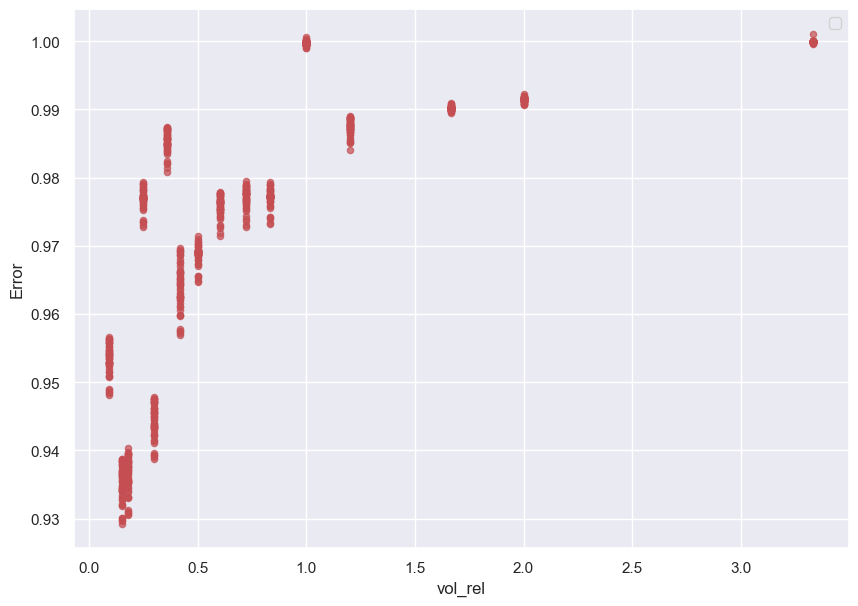

In [123]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="vol_rel", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("vol_rel")
ax1.set_ylabel("Error")
plt.legend()


/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_10829/2625350640.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Sam", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


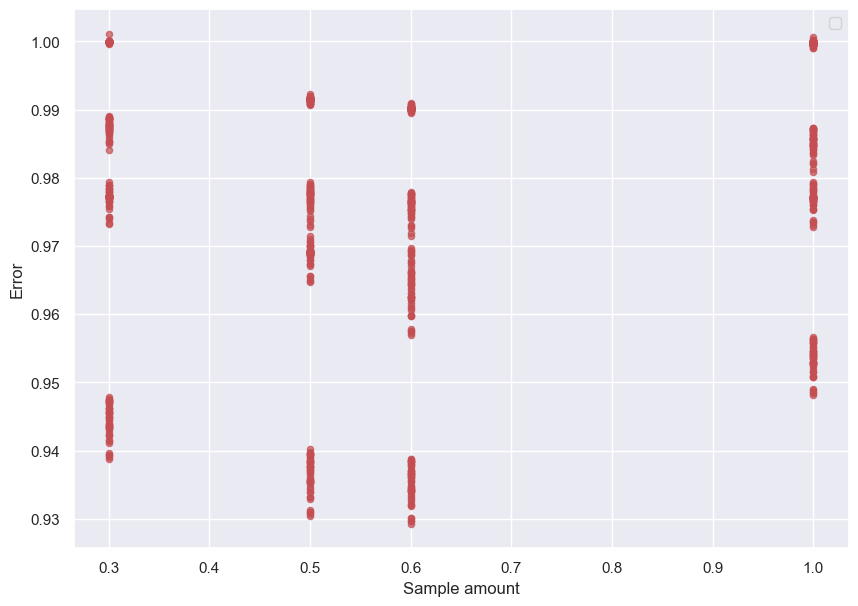

In [124]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Sam", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("Sample amount")
ax1.set_ylabel("Error")
plt.legend()


/var/folders/xl/py35gn7n0cxfmdl8j6m5tjlm0000gn/T/ipykernel_10829/3219750553.py:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Ref", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


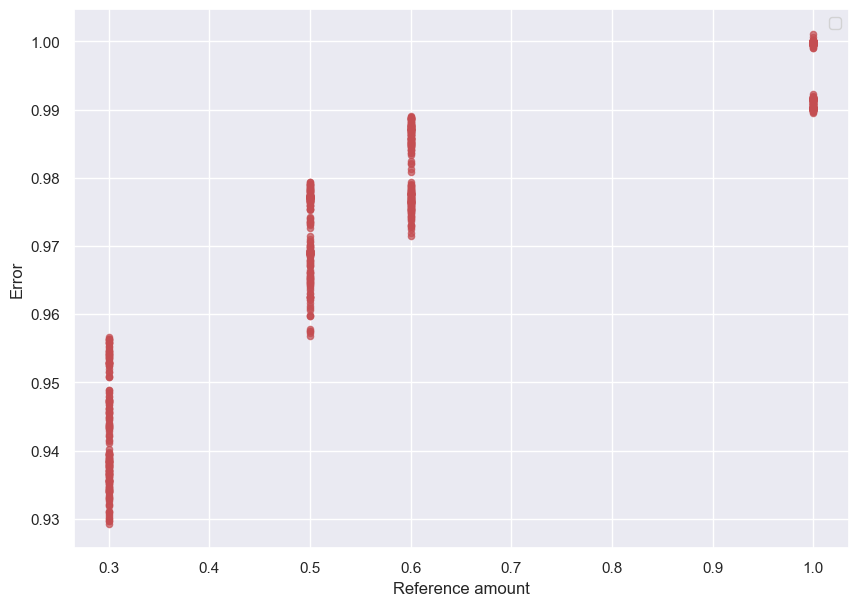

In [125]:
ax1 = cp_clean_data.plot(kind="scatter", y="St(%)", x="Ref", alpha=0.7,figsize=(10,7), cmap=plt.get_cmap("jet"),color='r')
ax1.set_xlabel("Reference amount")
ax1.set_ylabel("Error")
plt.legend()


# Train Test & Target Data

In [126]:
# target data
target = np.round(cp_clean_data['St(%)'],2)
vol_data = np.round(cp_clean_data[['Ref','Sam','vol_rel']],2)


In [127]:
from sklearn.model_selection import train_test_split 
vol_train, vol_test, target_train, target_test = train_test_split(vol_data, target, test_size=0.1, random_state= 42)

In [128]:
inputs = vol_data.copy() # making another copy of data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_inputs = scaler.fit_transform(inputs)

In [129]:
# splitting data
from sklearn.model_selection import train_test_split
data_train, data_test_val, targets_train, target_test_val = train_test_split(scaled_inputs, target, test_size=0.2, random_state=42)


In [130]:
# splitting data in test and validation sets
data_test, data_validation, target_test, target_validation = train_test_split(data_test_val, target_test_val, test_size=0.5) 

## saving train, test and validation data in npz

In [131]:
np.savez('data_train', input=data_train, targets=targets_train)
np.savez('data_validation', input=data_validation, targets=target_validation)
np.savez('data_test', input=data_test, targets=target_test)

## Deploying scaler pkl




In [132]:
import joblib
joblib.dump(scaler,'scaler.pkl') #scaler for standarlisation model pkl

['scaler.pkl']